<a href="https://colab.research.google.com/github/Sayed-Hossein-Hosseini/A_Journey_into_the_Depths_of_Neural_Networks/blob/master/Entering_the_World_of_Deep_Neural_Networks_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Entering the World of Deep Neural Networks CNN**

## **Libraries**

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## **GPU**

In [3]:
#0. Check GPU availability and device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


## **Hyperparameters**

In [6]:
#1. Hyperparameters
NUM_EPOCHS = 100
BATCH_SIZE = 128
LEARNING_RATE = 0.001

## **CIFAR-10 Data Preparation**

### **Preprocessing**

In [7]:
# Transformations: Tensor Conversion and Normalization
# Mean and Standard Deviation Values ​​for CIFAR-10 (Standard)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)) # مقادیر دقیق‌تر
    # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) # ساده‌تر، برای نرمال‌سازی به بازه [-1, 1]
])

### **Download and Load the Training Dataset**

In [8]:
# Download and load training dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

### **Download and Load the Test Dataset**

In [9]:
# Download and load the test dataset
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

### **CIFAR-10 Classes**

In [10]:
# CIFAR-10 classes
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

### **Display Images**

<ipython-input-11-6a4f260d7741>:6: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  img = img * std[:, None, None] + mean[:, None, None]


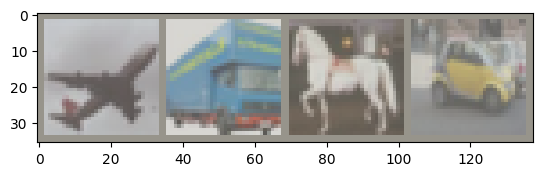

plane truck horse car  


In [11]:
# Function to display images
def imshow(img):
    img = img / 2 + 0.5     # unnormalize if normalized to [-1,1]
    mean = np.array([0.4914, 0.4822, 0.4465])
    std = np.array([0.2023, 0.1994, 0.2010])
    img = img * std[:, None, None] + mean[:, None, None]
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Show some random educational images
dataiter = iter(train_loader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images[:4]))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

## **First Structure**

In [ ]:
# #1. Hyperparameters
# NUM_EPOCHS = 100
# BATCH_SIZE = 128
# LEARNING_RATE = 0.001

### **CNN Model Definition**

In [16]:
class CNN(nn.Module):
    def __init__(self, num_classes=10):
        super(CNN, self).__init__()
        # Input: 3x32x32 (channels, height, width)

        # First convolutional layer: 32 filters, kernel size 3x3, ReLU activation
        # Output with padding=1: 32x32x32
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.relu1 = nn.ReLU()

        # First Max Pooling layer: pool size 2x2
        # Output: 32x16x16
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Second convolutional layer: 64 filters, kernel size 3x3, ReLU activation
        # Output with padding=1: 64x16x16
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.relu2 = nn.ReLU()

        # Second Max Pooling layer: pool size 2x2
        # Output: 64x8x8
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Flatten layer
        # Flattened input dimensions: 64 * 8 * 8 = 4096
        self.flatten = nn.Flatten()

        # First Fully Connected layer: 128 neurons, ReLU activation
        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        self.relu3 = nn.ReLU()

        # Second Fully Connected layer (output layer): 10 neurons, Softmax activation
        # Note: nn.CrossEntropyLoss combines LogSoftmax and NLLLoss internally.
        # Therefore, if you use nn.CrossEntropyLoss, you don't need a separate Softmax layer.
        # But if you want the output to be probabilities (e.g., for inference) or use NLLLoss, LogSoftmax is more suitable.
        # If specifically Softmax is required, it can be applied in the forward method.
        self.fc2 = nn.Linear(128, num_classes)
        # self.softmax = nn.Softmax(dim=1)  # or nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)

        x = self.flatten(x)  # or x = x.view(-1, 64 * 8 * 8)

        x = self.fc1(x)
        x = self.relu3(x)

        x = self.fc2(x)
        # If we want the output to be probabilities directly:
        # x = self.softmax(x)  # Typically used during inference, not during training with CrossEntropyLoss
        # Or if using NLLLoss:
        # x = F.log_softmax(x, dim=1)
        return x

model = CNN(num_classes=len(classes)).to(device)
print(model)

CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=4096, out_features=128, bias=True)
  (relu3): ReLU()
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


### **Define the loss function and optimizer**

In [17]:
# 4. Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()  # This loss function includes Softmax internally
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

### **Training loop**

In [20]:
# 5. Training loop
total_steps = len(train_loader)
print(f"Starting training for {NUM_EPOCHS} epochs...")

for epoch in range(NUM_EPOCHS):
    model.train()  # Set model to training mode
    running_loss = 0.0

    for i, (images, labels) in enumerate(train_loader):
        # Move data to device (GPU/CPU)
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()     # Zero the gradients
        loss.backward()           # Backpropagation
        optimizer.step()          # Update weights

        running_loss += loss.item()

        if (i + 1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{NUM_EPOCHS}], Step [{i+1}/{total_steps}], Loss: {loss.item():.4f}')

    avg_epoch_loss = running_loss / total_steps
    print(f'Epoch [{epoch+1}/{NUM_EPOCHS}] completed. Average Training Loss: {avg_epoch_loss:.4f}')

    # Optional: Evaluate model after each epoch
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():  # Disable gradient computation
        correct = 0
        total = 0
        val_loss = 0
        for images_val, labels_val in test_loader:
            images_val = images_val.to(device)
            labels_val = labels_val.to(device)

            outputs_val = model(images_val)
            loss_val = criterion(outputs_val, labels_val)
            val_loss += loss_val.item()

            _, predicted = torch.max(outputs_val.data, 1)
            total += labels_val.size(0)
            correct += (predicted == labels_val).sum().item()

        accuracy = 100 * correct / total
        avg_val_loss = val_loss / len(test_loader)
        print(f'Validation Loss: {avg_val_loss:.4f}, Accuracy on test images: {accuracy:.2f} %')

print('Finished Training.')

Starting training for 100 epochs...
Epoch [1/100], Step [100/782], Loss: 2.3107
Epoch [1/100], Step [200/782], Loss: 2.2893
Epoch [1/100], Step [300/782], Loss: 2.2968
Epoch [1/100], Step [400/782], Loss: 2.3145
Epoch [1/100], Step [500/782], Loss: 2.3151
Epoch [1/100], Step [600/782], Loss: 2.3038
Epoch [1/100], Step [700/782], Loss: 2.2995
Epoch [1/100] completed. Average Training Loss: 2.3079
Validation Loss: 2.3062, Accuracy on test images: 10.00 %
Epoch [2/100], Step [100/782], Loss: 2.2921
Epoch [2/100], Step [200/782], Loss: 2.3036
Epoch [2/100], Step [300/782], Loss: 2.3388
Epoch [2/100], Step [400/782], Loss: 2.3106
Epoch [2/100], Step [500/782], Loss: 2.2855
Epoch [2/100], Step [600/782], Loss: 2.3141
Epoch [2/100], Step [700/782], Loss: 2.3138
Epoch [2/100] completed. Average Training Loss: 2.3074
Validation Loss: 2.3073, Accuracy on test images: 10.00 %
Epoch [3/100], Step [100/782], Loss: 2.2967
Epoch [3/100], Step [200/782], Loss: 2.2977
Epoch [3/100], Step [300/782], Los

### **Final Model Evaluation**

In [21]:
# 6. Final evaluation of the model on the test data
model.eval()  # Ensure the model is in evaluation mode
with torch.no_grad():
    correct = 0
    total = 0
    all_predicted = []
    all_labels = []

    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_predicted.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

    final_accuracy = 100 * correct / total
    print(f'Accuracy of the network on the 10000 test images: {final_accuracy:.2f} %')

    # (Optional) Show accuracy per class
    class_correct = list(0. for i in range(len(classes)))
    class_total = list(0. for i in range(len(classes)))

    for i in range(len(all_labels)):
        label = all_labels[i]
        pred = all_predicted[i]
        if label == pred:
            class_correct[label] += 1
        class_total[label] += 1

    print("\nAccuracy per class:")
    for i in range(len(classes)):
        if class_total[i] > 0:
            print(f'Accuracy of {classes[i]:5s} : {100 * class_correct[i] / class_total[i]:.2f} %')
        else:
            print(f'Accuracy of {classes[i]:5s} : N/A (no samples)')

Accuracy of the network on the 10000 test images: 10.00 %

Accuracy per class:
Accuracy of plane : 0.00 %
Accuracy of car   : 100.00 %
Accuracy of bird  : 0.00 %
Accuracy of cat   : 0.00 %
Accuracy of deer  : 0.00 %
Accuracy of dog   : 0.00 %
Accuracy of frog  : 0.00 %
Accuracy of horse : 0.00 %
Accuracy of ship  : 0.00 %
Accuracy of truck : 0.00 %


## **Second Structure**

In [ ]:
# #1. Hyperparameters
# NUM_EPOCHS = 100
# BATCH_SIZE = 128
# LEARNING_RATE = 0.001

### **CNN Model Definition**

In [12]:
class ImprovedCNN(nn.Module):
    def __init__(self, num_classes=10):
        super(ImprovedCNN, self).__init__()
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1, bias=False), # bias=False because we have BN
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2) # 64x16x16
        )
        self.conv_block2 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2) # 128x8x8
        )
        self.conv_block3 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2) # 256x4x4
        )

        self.flatten = nn.Flatten()
        # Flattened size: 256 * 4 * 4 = 4096

        self.fc_block = nn.Sequential(
            nn.Linear(256 * 4 * 4, 512, bias=False), # You can put 1024 or 512 neurons
            nn.BatchNorm1d(512), # BN for FC layers
            nn.ReLU(),
            nn.Dropout(0.5), # Dropout with probability 0.5
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.conv_block1(x)
        x = self.conv_block2(x)
        x = self.conv_block3(x)
        x = self.flatten(x)
        x = self.fc_block(x)
        return x

model = ImprovedCNN(num_classes=len(classes)).to(device)
print(model)

ImprovedCNN(
  (conv_block1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ce

### **Define the loss function and optimizer**

In [13]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

### **Training loop**

In [14]:
# --- Lists to store history (optional) ---
train_losses_history = []
val_losses_history = []
val_accuracies_history = []

# 5. Training loop
total_steps = len(train_loader) # train_loader should be created with the new BATCH_SIZE and transform_train
print(f"Starting training for {NUM_EPOCHS} epochs...")
print(f"Total training steps per epoch: {total_steps}")
print(f"Total validation steps per epoch: {len(test_loader)}") # test_loader with transform_test

for epoch in range(NUM_EPOCHS):
    model.train()  # Set model to training mode
    running_loss = 0.0

    for i, (images, labels) in enumerate(train_loader):
        # Move data to device (GPU/CPU)
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()     # Zero the gradients
        loss.backward()           # Backpropagation
        optimizer.step()          # Update weights

        running_loss += loss.item()

        if (i + 1) % 100 == 0: # Log every 100 steps
            print(f'Epoch [{epoch+1}/{NUM_EPOCHS}], Step [{i+1}/{total_steps}], Loss: {loss.item():.4f}')

    avg_epoch_loss = running_loss / total_steps
    train_losses_history.append(avg_epoch_loss) # <--- Added
    print(f'Epoch [{epoch+1}/{NUM_EPOCHS}] completed. Average Training Loss: {avg_epoch_loss:.4f}')

    # Optional: Evaluate model after each epoch
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():  # Disable gradient computation
        correct = 0
        total = 0
        val_loss_epoch_sum = 0.0 # Renamed for clarity
        for images_val, labels_val in test_loader:
            images_val = images_val.to(device)
            labels_val = labels_val.to(device)

            outputs_val = model(images_val)
            loss_val = criterion(outputs_val, labels_val) # Calculate validation loss
            val_loss_epoch_sum += loss_val.item()

            _, predicted = torch.max(outputs_val.data, 1)
            total += labels_val.size(0)
            correct += (predicted == labels_val).sum().item()

        accuracy = 100 * correct / total
        avg_val_loss_epoch = val_loss_epoch_sum / len(test_loader) # Your previous avg_val_loss

        val_losses_history.append(avg_val_loss_epoch) # <--- Added
        val_accuracies_history.append(accuracy) # <--- Added

        print(f'Validation Loss: {avg_val_loss_epoch:.4f}, Accuracy on test images: {accuracy:.2f} %')

print('Finished Training.')

Starting training for 100 epochs...
Total training steps per epoch: 391
Total validation steps per epoch: 79
Epoch [1/100], Step [100/391], Loss: 1.0181
Epoch [1/100], Step [200/391], Loss: 0.9715
Epoch [1/100], Step [300/391], Loss: 0.8173
Epoch [1/100] completed. Average Training Loss: 1.0720
Validation Loss: 0.7966, Accuracy on test images: 72.62 %
Epoch [2/100], Step [100/391], Loss: 0.5494
Epoch [2/100], Step [200/391], Loss: 0.7258
Epoch [2/100], Step [300/391], Loss: 0.6382
Epoch [2/100] completed. Average Training Loss: 0.6623
Validation Loss: 0.6887, Accuracy on test images: 75.83 %
Epoch [3/100], Step [100/391], Loss: 0.6949
Epoch [3/100], Step [200/391], Loss: 0.5581
Epoch [3/100], Step [300/391], Loss: 0.4149
Epoch [3/100] completed. Average Training Loss: 0.5092
Validation Loss: 0.5955, Accuracy on test images: 80.00 %
Epoch [4/100], Step [100/391], Loss: 0.4860
Epoch [4/100], Step [200/391], Loss: 0.2962
Epoch [4/100], Step [300/391], Loss: 0.3823
Epoch [4/100] completed.

### **Code for Plotting**

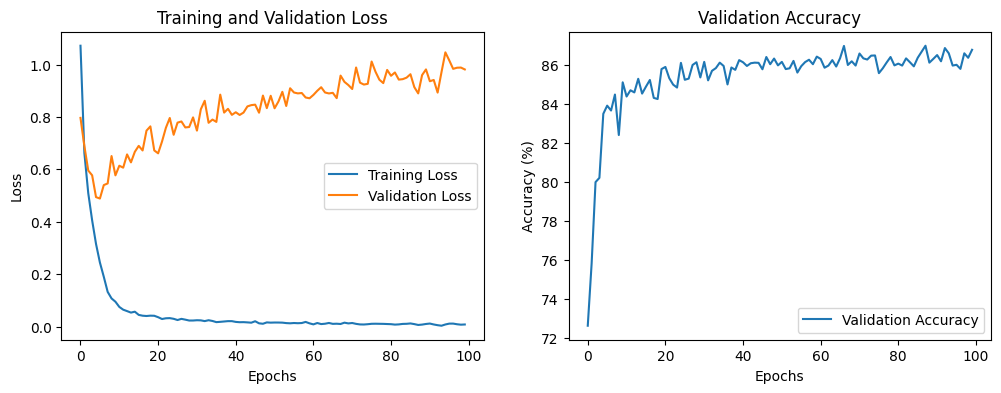

In [16]:
# --- Code for plotting (optional) ---
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses_history, label='Training Loss')
plt.plot(val_losses_history, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(val_accuracies_history, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Validation Accuracy')
plt.show()

### **Final Model Evaluation**

In [17]:
# 6. Final evaluation of the model on the test data
model.eval()  # Ensure the model is in evaluation mode
with torch.no_grad():
    correct = 0
    total = 0
    all_predicted = []
    all_labels = []

    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_predicted.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

    final_accuracy = 100 * correct / total
    print(f'Accuracy of the network on the 10000 test images: {final_accuracy:.2f} %')

    # (Optional) Show accuracy per class
    class_correct = list(0. for i in range(len(classes)))
    class_total = list(0. for i in range(len(classes)))

    for i in range(len(all_labels)):
        label = all_labels[i]
        pred = all_predicted[i]
        if label == pred:
            class_correct[label] += 1
        class_total[label] += 1

    print("\nAccuracy per class:")
    for i in range(len(classes)):
        if class_total[i] > 0:
            print(f'Accuracy of {classes[i]:5s} : {100 * class_correct[i] / class_total[i]:.2f} %')
        else:
            print(f'Accuracy of {classes[i]:5s} : N/A (no samples)')

Accuracy of the network on the 10000 test images: 86.80 %

Accuracy per class:
Accuracy of plane : 88.00 %
Accuracy of car   : 96.10 %
Accuracy of bird  : 82.70 %
Accuracy of cat   : 73.00 %
Accuracy of deer  : 85.80 %
Accuracy of dog   : 81.70 %
Accuracy of frog  : 90.40 %
Accuracy of horse : 88.00 %
Accuracy of ship  : 92.10 %
Accuracy of truck : 90.20 %
